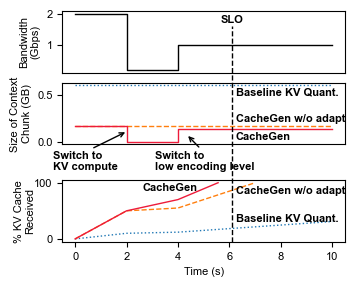

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

# Define the data
time = [0, 1, 2, 3, 4, 5, 6, 10]

bandwidth = [2, 2, 0.2, 0.2, 1, 1, 1, 1]

adaptation = [0.17, 0.17, 0, 0, 0.13, 0.13, 0.13, 0.13]
no_adaptation = [0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17]
base_quant = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]



slo_time = 3
gs = gridspec.GridSpec(4, 1, height_ratios=[1,1,0.25, 1])
# Create the plot
fig = plt.figure(figsize=(3.65, 3))

ax = plt.subplot(gs[0])

# Plot the step graph for bandwidth
ax.step(time, bandwidth, where='post', color="black")
ax.set_xticks([])

# Draw a vertical dashed line for SLO
# ax[0].axvline(x=slo_time, color='k', linestyle='--')

# Labeling the Axes
# plt.xlabel('Time')jkk:w

ax.set_ylabel('Bandwidth\n(Gbps)')


ax = plt.subplot(gs[1])
ax.step(time, base_quant, where='post', ls=":")
ax.step(time, no_adaptation, where='post', ls="--")
ax.step(time, adaptation, where='post', color='#ED1B3A')
ax.set_xticks([])
ax.set_ylabel('Size of Context\nChunk (GB)')
# ax.legend(["Baseline KV Quantization", "CacheGen w/o adaptation", "CacheGen w/ adaptation"], loc="upper center", frameon=False, bbox_to_anchor=[0.5,2.9],
#           ncols=2)

# Title and legend
# plt.title('Bandwidth over Time with SLO')
# plt.legend()
ax = plt.subplot(gs[3])
time = [0, 2, 4, 10]
base_quant = [0, 10, 12, 31]
ax.plot(time, base_quant, ls=":")

time = [0, 2, 4, 7]
no_adaptation = [0, 50, 55, 100]
ax.plot(time, no_adaptation, ls="--")

time = [0, 2, 4, 5.56]
adaptation = [0, 50, 70, 100]
ax.plot(time, adaptation, color='#ED1B3A')

ax.set_ylabel('% KV Cache\nReceived', labelpad=-1)
ax.set_xlabel("Time (s)")

# add dashed line
line = plt.Line2D([0.59, 0.59], [0.11, 0.83], color='black', linestyle='--', transform=fig.transFigure)
fig.lines = [line]
fig.text(0.56, 0.84, 'SLO', transform=fig.transFigure, weight="bold")
fig.text(0.1, 0.35, 'Switch to\nKV compute', transform=fig.transFigure, weight="bold")
fig.text(0.378, 0.35, 'Switch to\nlow encoding level', transform=fig.transFigure, weight="bold")

fig.text(0.6, 0.6, 'Baseline KV Quant.', transform=fig.transFigure, weight="bold")
fig.text(0.6, 0.51, 'CacheGen w/o adapt', transform=fig.transFigure, weight="bold")
fig.text(0.6, 0.45, 'CacheGen', transform=fig.transFigure, weight="bold")

fig.text(0.6, 0.18, 'Baseline KV Quant.', transform=fig.transFigure, weight="bold")
fig.text(0.6, 0.27, 'CacheGen w/o adapt', transform=fig.transFigure, weight="bold")
fig.text(0.345, 0.28, 'CacheGen', transform=fig.transFigure, weight="bold")

# Variable to denote arrow properties
arrowprops = dict(arrowstyle='->', linewidth=1, color='black')

# Annotate an arrow in figure positions
ax.annotate('', xytext=(0.25, 0.46), xy=(0.35, 0.52), 
            arrowprops=arrowprops, xycoords='figure fraction',
            textcoords='figure fraction')
ax.annotate('', xytext=(0.55, 0.46), xy=(0.51, 0.51), 
            arrowprops=arrowprops, xycoords='figure fraction',
            textcoords='figure fraction')

# Show the plot
fig.savefig("fig-adaptation-case.pdf", bbox_inches="tight", transparent=True)